In [172]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [173]:
# Read CSV
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")
ride_data.head(20)
city_data.head(20)



,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [175]:
# since there might be more cities in the city_data than in ride_data which will cause errors when plotting
#I will join in relevant information from the city_data

merge_table=pd.merge(ride_data,city_data, on="city", how="left")
merge_table.head(20)


# Assigning number to city type so it can be used as variable in scatter plot
def label_race (type):
   if type == "Urban":
      return '1'
   elif type == "Suburban" :
      return '2'
   elif type == "Rural" :
      return '3'
   else:
      return '4'

# Add new column
ride_df['type2'] = ride_df['type'].apply(label_race)
ride_df.head()


,city,type,Average,Count,Total,type2
0,Alvarezhaven,Urban,23.93,31,651,1
1,Alyssaberg,Urban,20.61,26,1742,1
2,Anitamouth,Suburban,37.32,9,144,2
3,Antoniomouth,Urban,23.62,22,462,1
4,Aprilchester,Urban,21.98,19,931,1


In [203]:
# Set tyoe to index so that we can use .loc
ride_df1=ride_df.set_index("type")
                

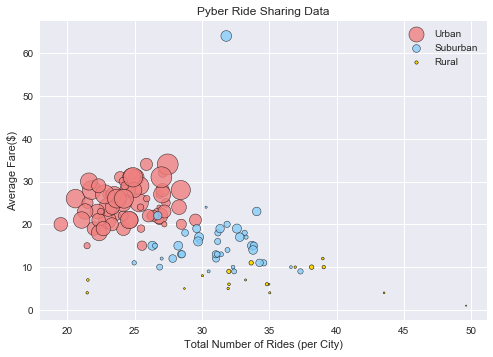

In [267]:

# Plot the scatter graph
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare($)")

# one scatter plot for each Type ( Urban, suburban, rural)
scatter1=plt.scatter(ride_df1 ["Average"].loc["Urban"], ride_df1 ["Count"].loc["Urban"], marker="o",c= "lightcoral",
                    sizes= (ride_df1 ["Total"]/5).loc["Urban"], alpha=0.8, label="Urban",edgecolor="black",linewidths=0.5)
scatter2=plt.scatter(ride_df1 ["Average"].loc["Suburban"], ride_df1 ["Count"].loc["Suburban"], marker="o",c= "lightskyblue",
                    sizes= (ride_df1 ["Total"]/5).loc["Suburban"], alpha=0.8, label="Suburban",edgecolor="black",linewidths=0.5)
scatter3=plt.scatter(ride_df1 ["Average"].loc["Rural"], ride_df1 ["Count"].loc["Rural"], marker="o",c= "gold",
                    sizes= (ride_df1 ["Total"]/5).loc["Rural"], alpha=1, label="Rural",edgecolor="black",linewidths=0.5)

plt.legend()

# Customize the grid
plt.style.use('seaborn')


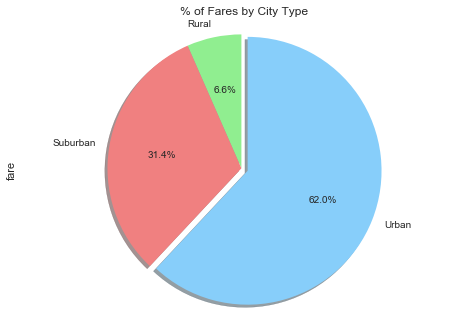

In [256]:
#group by city type
group=merge_table.groupby("type")

#% of Total Fares by City Type
totalFares=group["fare"].sum()


colors = ["lightgreen","lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.title("% of Fares by City Type")


totalFares.plot(kind="pie",explode=explode,colors=colors,startangle=90,autopct="{:.1f}%".format,shadow=True)  

plt.axis("equal")
plt.show()



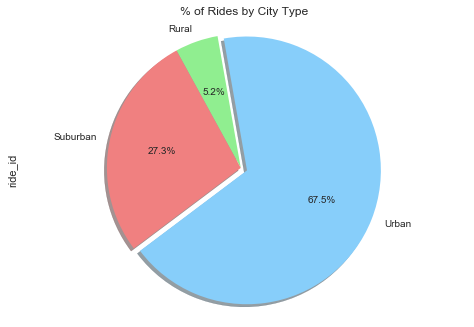

In [257]:
#% of Total Rides by City Type

totalRides=group["ride_id"].count()


colors = ["lightgreen","lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.title("% of Rides by City Type")


totalRides.plot(kind="pie",explode=explode,colors=colors,startangle=100,autopct="{:.1f}%".format,shadow=True)  

plt.axis("equal")
plt.show()


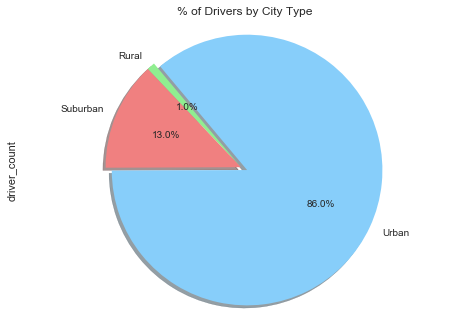

In [258]:
#% of Total Drivers by City Type

totalDrivers=group["driver_count"].sum()


colors = ["lightgreen","lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)
plt.title("% of Drivers by City Type")


totalDrivers.plot(kind="pie",explode=explode,colors=colors,startangle=130,autopct="{:.1f}%".format,shadow=True)  

plt.axis("equal")
plt.show()